## Q3. Clustering Algorithm Practice

Choose three clustering algorithms, run the dataset in Blackboard folder: 
Homework2 -> clustering-dataset, implement the three clustering algorithms and visualize them.

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing the dataset

In [2]:
C1 = pd.read_table('Clustering-dataset/Clustering1.txt', delim_whitespace=True, skipinitialspace=True)
C3 = pd.read_table('Clustering-dataset/Clustering3.txt', delim_whitespace=True, skipinitialspace=True)
C4 = pd.read_table('Clustering-dataset/Clustering4.txt', delim_whitespace=True, skipinitialspace=True)
C5 = pd.read_table('Clustering-dataset/Clustering5.txt', delim_whitespace=True, skipinitialspace=True)

### Clustering 1

This dataset consists of seven clusters with various shapes and sizes. There are noises connecting clusters.

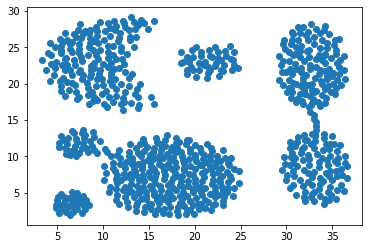

In [3]:
plt.scatter(x = C1['Column1'], y = C1['Column2'])

#### (a) k-means clustering

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="k-means++", n_clusters=7, random_state=0).fit(C1)
labels = kmeans.labels_

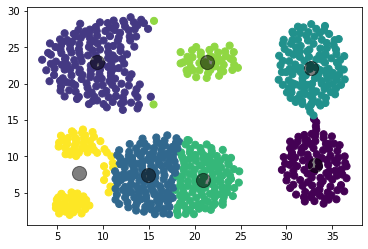

In [5]:
plt.scatter(C1['Column1'], C1['Column2'], c=labels, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

We can see that k-means did not work well. This may due to the fact that k-means has trouble handling non-globular clusters or clusters of different sizes.

#### (b) Hierarchical clustering (Average Link)

In [6]:
from sklearn.cluster import AgglomerativeClustering
average = AgglomerativeClustering(n_clusters=7, linkage='average').fit(C1)
labels = average.labels_

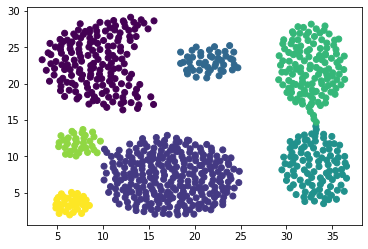

In [7]:
plt.scatter(C1['Column1'], C1['Column2'], c=labels)

Hierarchical clustering with average link performs well. This algorithm compromises the other two schemes: single link and complete link. 

#### (c) Spectral clustering

In [8]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=7, random_state=0).fit(C1)
labels = spectral.labels_

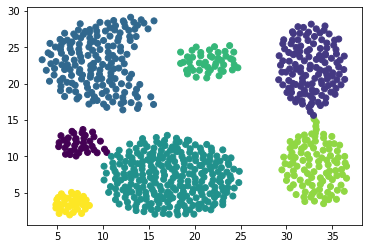

In [9]:
plt.scatter(C1['Column1'], C1['Column2'], c=labels)

Spectral clustering, which is a graph-based clustering approach, also works very well. It can handle a wide variety of shapes and sizes of data.

### Clustering 3

This datasets contain 2 adjacent regions with uniform density. There are noises presenting.

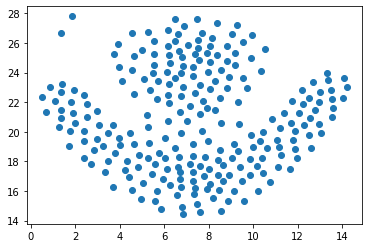

In [10]:
plt.scatter(x=C3['Column1'], y=C3['Column2'])

#### (a) Spectral clustering

In [11]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=2, eigen_solver='lobpcg', affinity="nearest_neighbors", 
                              n_neighbors=5).fit(C3)
labels = spectral.labels_

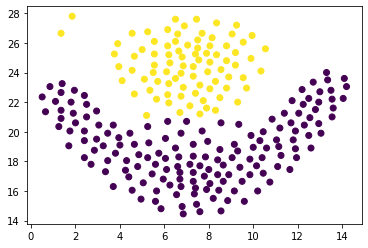

In [12]:
plt.scatter(C3['Column1'], C3['Column2'], c=labels)

Spectral clustering performs well on clusters that are irregular.

#### (b) Hierarchical clustering (Ward's method)

In [13]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(C3)
labels = ward.labels_

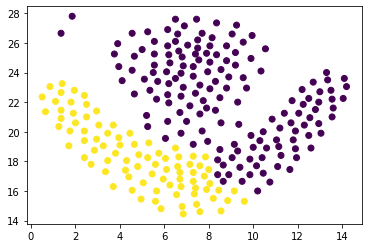

In [14]:
plt.scatter(C3['Column1'], C3['Column2'], c=labels)

Ward's method performs poorly on this dataset. It is the hierarchical analogue of K-means and tends to be biased towards globular clusters.

#### (c) DBSCAN

In [15]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=6).fit(C3)
labels = db.labels_

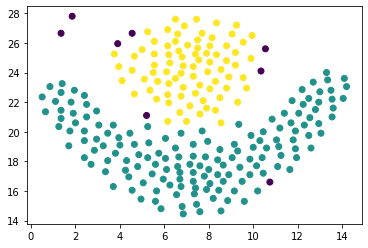

In [16]:
plt.scatter(C3['Column1'], C3['Column2'], c=labels)

DBSCAN performs relatively well on this dataset. It can handle clusters of different shapes and sizes.

### Clustering 4

This dataset contains 2 sparse data regions with different densities.

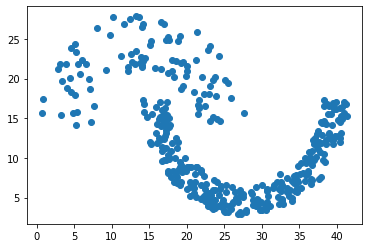

In [17]:
plt.scatter(x=C4['Column1'], y=C4['Column2'])

#### (a) Spectral clustering

In [18]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors", 
                              n_neighbors=10).fit(C4)
labels = spectral.labels_

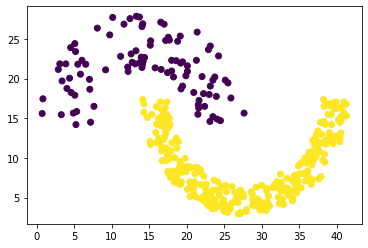

In [19]:
plt.scatter(C4['Column1'], C4['Column2'], c=labels)

Spectral clustering can handle clusters with varing densities and shapes.

#### (b) Hierarchical clustering (Complete Link)

In [20]:
from sklearn.cluster import AgglomerativeClustering
complete = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(C4)
labels = complete.labels_

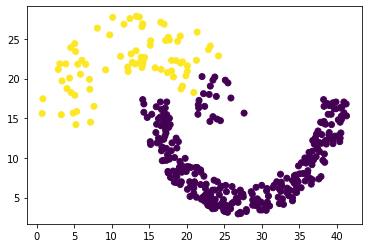

In [21]:
plt.scatter(C4['Column1'], C4['Column2'], c=labels)

Hierarchical clustering with complete link does not performs well. It tends to be biased towards globular clusters.

#### (c) DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.5, min_samples=20).fit(C4)
labels = db.labels_

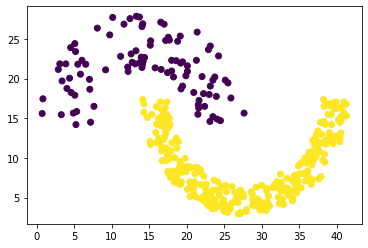

In [23]:
plt.scatter(C4['Column1'], C4['Column2'], c=labels)

DBSCAN, which is a density-based clustering algorithm, performs well on this dataset.

### Clustering 5

This dataset contains well-separated and nonspherical clusters which have a spiral pattern.

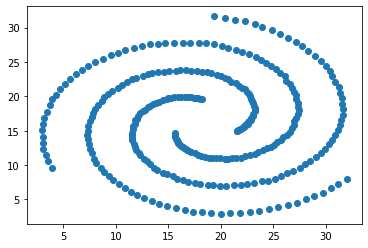

In [24]:
plt.scatter(x=C5['Column1'], y=C5['Column2'])

#### (a) DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2, min_samples=4).fit(C5)
labels = db.labels_

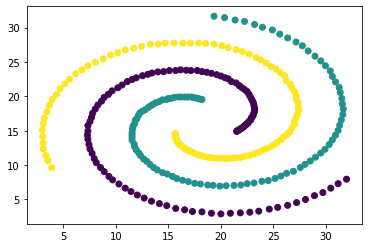

In [26]:
plt.scatter(C5['Column1'], C5['Column2'], c=labels)

DBSCAN performs really well.

#### (b) Hierarchical clustering (Single Link)

In [27]:
from sklearn.cluster import AgglomerativeClustering
single = AgglomerativeClustering(n_clusters=3, linkage='single').fit(C5)
labels = single.labels_

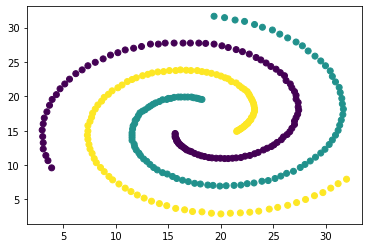

In [28]:
plt.scatter(C5['Column1'], C5['Column2'], c=labels)

Hierarchical clustering with single link also performs well. This clustering algorithm can handle non-elliptical shapes.

#### (c) Spectral clustering

In [29]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=3).fit(C5)
labels = spectral.labels_

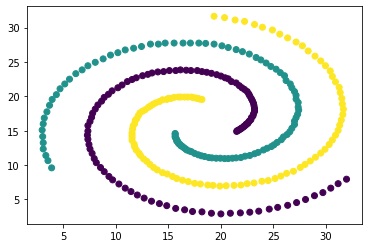

In [30]:
plt.scatter(C5['Column1'], C5['Column2'], c=labels)

Spectral clustering performs well as it can handle clusters with irregular shapes.